<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/Exploring_the_relationship_between_covariance_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

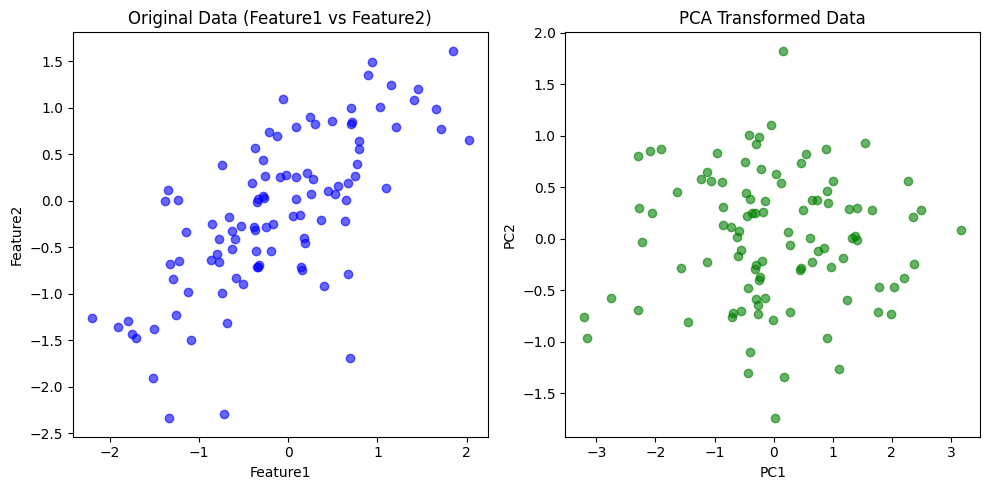

Results saved to student_output.json.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.decomposition import PCA

# Step 1: Generate the Dataset
np.random.seed(42)
cov_matrix = [[1.0, 0.8, 0.6],
              [0.8, 1.0, 0.7],
              [0.6, 0.7, 1.0]]
mean = [0, 0, 0]
size = 100
data = np.random.multivariate_normal(mean=mean, cov=cov_matrix, size=size)
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

# Step 2: Compute the Covariance Matrix of the Dataset
computed_cov_matrix = df.cov().values

# Step 3: Perform PCA to Compute Eigenvalues and Eigenvectors
pca = PCA(n_components=3)
pca.fit(df)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Step 4: Visualize Original Data and PCA Transformed Data
plt.figure(figsize=(10, 5))

# Original data visualization
plt.subplot(1, 2, 1)
plt.scatter(df['Feature1'], df['Feature2'], c='blue', alpha=0.6)
plt.title("Original Data (Feature1 vs Feature2)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")

# Transformed data visualization (first two principal components)
df_pca = pca.transform(df)
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='green', alpha=0.6)
plt.title("PCA Transformed Data")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

# Step 5: Save Results to JSON File
output = {
    "cov_matrix": computed_cov_matrix.tolist(),
    "eigenvalues": eigenvalues.tolist(),
    "visualization": "done"
}

# Write output to student_output.json
with open("student_output.json", "w") as f:
    json.dump(output, f, indent=4)

print("Results saved to student_output.json.")
